<h1>Least Square regression with simulated (synthetic data) reverse procedure</h1>


In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy.random import normal
from sklearn.linear_model import LinearRegression


In [2]:
#visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

We will be experimenting with synthetic data to develop the least square approximations on the reverse.  
Our equation of the linear model: 
<p>$$y_{i}=α + βx_{i} + ε_{i} (i=1,....,n)(1)$$</p>  

We are going to create synthetic data for a number of observations say $n$ and we will simulate our experiment to find a and b. 
<p>We choose a constant term -$a$ say $a=10$ and a slope coefficient -$b$ say, $b=1$. We will generate $n$ random disturbances $e_{1},.... e_{n}$ from a normal distribution with mean zero and variance $σ^2=25$ so, $σ=5$. </p>

In [3]:
#define our parameters a and b - sigma is the variance n is the number of observations
a=10; b=1; sigma=5; n=20

In [4]:
#define seed with 1 to make the experiment repeatable with same data
seed(1)
#Generate a sequence of n disturbances 
e = normal(loc=0, scale=1, size=n)
e

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521])

Apply a variance of 5 to disturbances 
We multiply the random normally distributed disturbances by variance sigma.  

In [5]:
EPS1=e*sigma
EPS1

array([  8.12172682,  -3.05878207,  -2.64085876,  -5.36484311,
         4.32703815, -11.50769348,   8.72405882,  -3.8060345 ,
         1.59519548,  -1.24685188,   7.31053969, -10.30070355,
        -1.61208602,  -1.92027177,   5.66884721,  -5.49945634,
        -0.86214104,  -4.38929209,   0.21106873,   2.91407607])

In [6]:
#Here we define our explained variable X of the equation 1
X=np.arange(1,n+1)

print(" The explained variable : " , X)

 The explained variable :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [ ]:
def e_X(num):
    return np.random.normal(sigma, num)

In [ ]:
X_d=np.vectorize(e_X)

In [ ]:
X=X_d(X)

In [ ]:
X

In [ ]:
for i in range (1,10):
    t = np.random.normal(sigma, 20)
    print (t)

In [ ]:
r = np.random.normal(size=20)
r

In [ ]:
r*5

In [ ]:
X

In [9]:
#We are developing equation (1) α+βx
YSYS=a+b*X
YSYS

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30])

>Data Y, are generated with disturbances ε~$N(0, 25)$ by the equation $y_{i}=α + βx_{i} + ε_{i} (i=1,....,n)$ <br> 
with $n=20, x_{i}=i$ with $i=1,...n, α=10$ and $β=1$

In [10]:
Y=YSYS+EPS1
Y #this is our data explanatory variable 

array([19.12172682,  8.94121793, 10.35914124,  8.63515689, 19.32703815,
        4.49230652, 25.72405882, 14.1939655 , 20.59519548, 18.75314812,
       28.31053969, 11.69929645, 21.38791398, 22.07972823, 30.66884721,
       20.50054366, 26.13785896, 23.61070791, 29.21106873, 32.91407607])

In [11]:
Y[7]

X[7]

8

Now we have finished with the data generation process. Let's now display the "fitted" line and the data. 

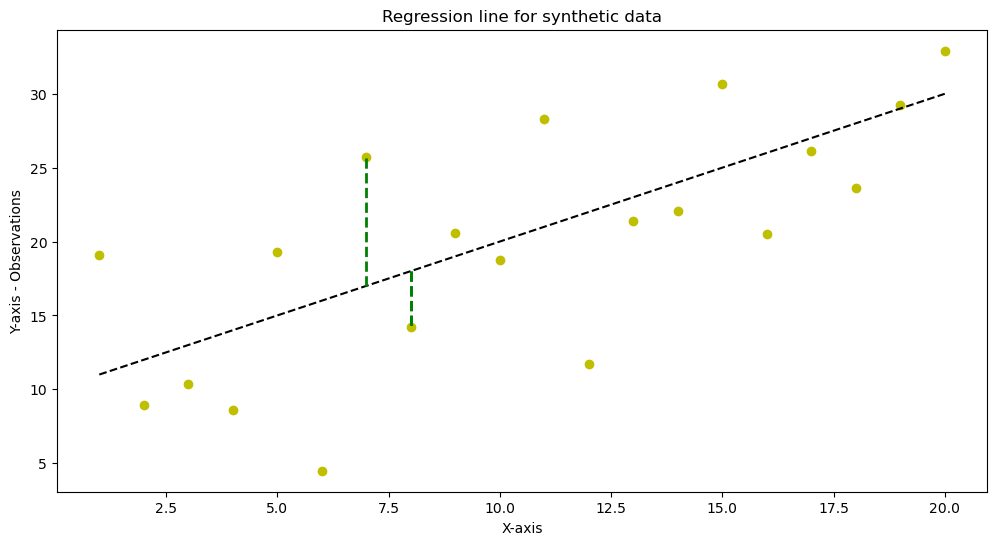

In [12]:
fig = plt.figure(figsize=(12,6))  #setting the figure size
plt.title('Regression line for synthetic data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis - Observations')
plt.plot(X, Y, 'yo', X, b*X+a, '--k')
plt.plot([X[7],X[7]], [18, Y[7]],color='green',linestyle='dashed',linewidth=2)
plt.plot([X[7],X[7]], [18, Y[7]],color='green',linestyle='dashed',linewidth=2, label="ei")
plt.plot([X[6],X[6]], [17, Y[6]],color='green',linestyle='dashed',linewidth=2, label="ei")
plt.show()

Above: Scatter diagram with observed (synthetic) data $({x}_i, {y}_i)$, regression line $(y_{i}=α + βx_{i})$, and
residual $({e}_i)$.

In [13]:
t=a+b*X

In [14]:
t

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30])

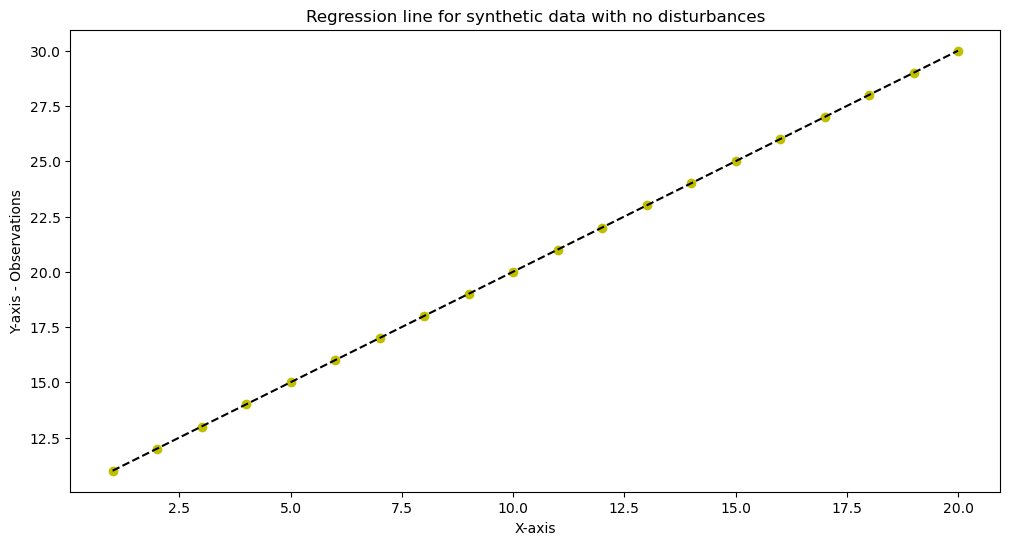

In [15]:
fig = plt.figure(figsize=(12,6))  #setting the figure size
plt.title('Regression line for synthetic data with no disturbances')
plt.xlabel('X-axis')
plt.ylabel('Y-axis - Observations')
plt.plot(X, t, 'yo', X, b*X+a, '--k')
plt.show()

C:\Users\ippok\conda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

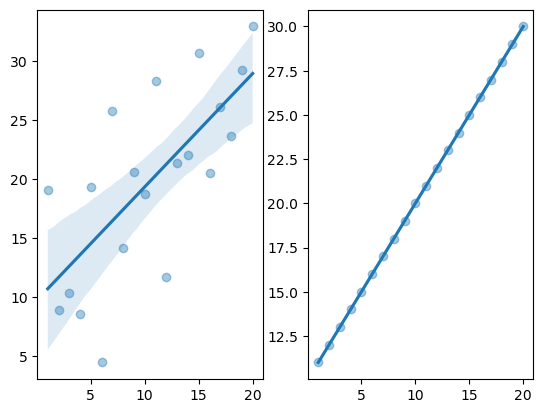

In [16]:
fig, ax = plt.subplots(1, 2)
sns.regplot(X, Y, ax=ax[0], scatter_kws={'alpha': 0.4})
sns.regplot(X, t, ax=ax[1], scatter_kws={'alpha': 0.4})

<H1>The Reverse procedure</H1>

>Now we will be taking the reverse procedure to verify and confirm the parameters a and b.<br>
Suppose we are given the data X and Y above and we were asked to calculate the parameters a and b and display the fitted line. 

So, our purpose is to find a and b that minimize the square difference<br><br> 
$$S(a, b)=\sum({y}_i-a-b{x}_i^2)$$

We derive the partial derivatives with respect to a and b and equate to zero <br><br>
$$\partial S/\partial α =-2\sum({y}_i-a-b{x}_i)=0$$
$$\partial S/\partial β =-2\sum{x}_i({y}_i-a-b{x}_i)=0$$
<br>


Dividing by <b>2n</b> finally we find $$a=\hat{y}-b\hat{x}$$<br>


$$b=\frac{\sum ({x}_i-\hat{x})({y}_i-\hat{y})}{\sum ({x}_i-\hat{x})^2}$$</p>


We can further simplify our fraction for b as folows:<br>
$$\sum ({x}_i-\hat{x})({y}_i-\hat{y})=\sum ({x}_i{y}_i)-\frac{1}{n}\sum {x}_i\sum {y}_i$$
$$\sum ({x}_i-\hat{x})^2=\sum {x}_i^2-\frac{1}{n}\Biggl(\sum {x}_i\Biggr)^2$$

In [17]:
#calculate the mean for x and y 
x_mean=np.mean(X)
y_mean=np.mean(Y)

In [18]:
#Calculate Σxi and Σyi
Sx=np.sum(X)
Sy=np.sum(Y)
#Square X and Y
X_sq=X**2
Y_sq=Y**2
#Calculate Σxiyi
Sxy=np.dot(X, Y.T)

In [19]:
X_sq

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144, 169,
       196, 225, 256, 289, 324, 361, 400], dtype=int32)

In [20]:
Y_sq

array([ 365.64043651,   79.9453781 ,  107.3118072 ,   74.5659345 ,
        373.53440352,   20.18081783,  661.72720223,  201.46865649,
        424.16207687,  351.68056451,  801.48665727,  136.87353748,
        457.44286441,  487.51439856,  940.57818929,  420.2722905 ,
        683.18767113,  557.46552803,  853.28653656, 1083.33640345])

In [21]:
X_sum_sq=np.sum(X_sq)
Y_sum_sq=np.sum(Y_sq)

In [22]:
print (X_sum_sq)
print (Y_sum_sq)

2870
9081.661354455558


In [23]:
Sy

396.6635363539271

In [24]:
#Our nominator is
nom=Sxy-((Sx*Sy)/20)
print (nom)

637.388638050521


In [25]:
#Our dennominator is
den=X_sum_sq-(1/n)*(Sx)**2
print (den)

665.0


In [26]:
#And we finally find b
b_c=nom/den
print ("parameter b is", b_c)

parameter b is 0.9584791549631895


In [27]:
#And we find a as well
alpha=np.mean(Y)-b*np.mean(X)
print ("parameter a is", alpha)

parameter a is 9.333176817696355


So, we calculated manually the regression line parameters and found them as;
$$a +\beta x=9.333176817696355+0.9584791549631895x$$
Which is very close to our initial given values of $a=10$ and $\beta =1$

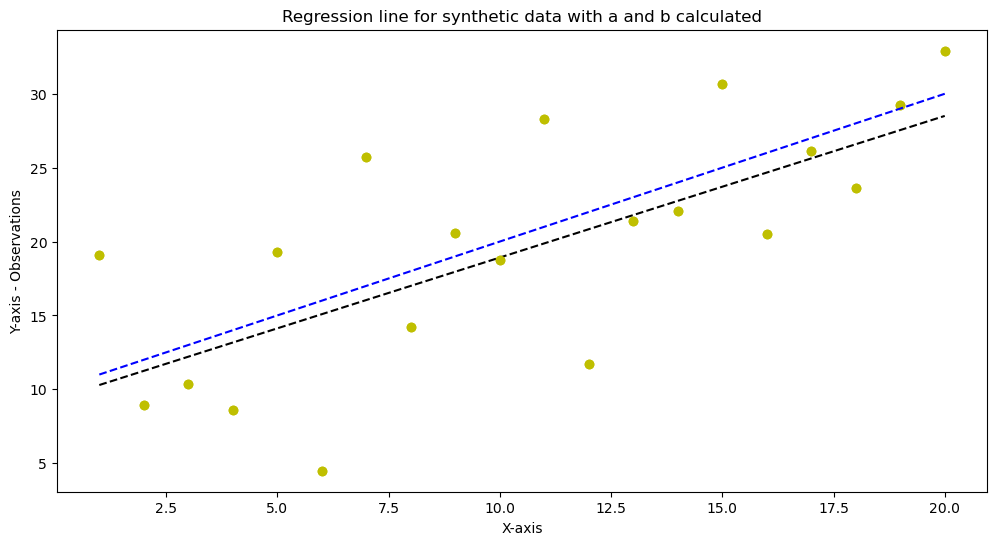

In [28]:
fig = plt.figure(figsize=(12,6))  #setting the figure size
plt.title('Regression line for synthetic data with a and b calculated')
plt.xlabel('X-axis')
plt.ylabel('Y-axis - Observations')
plt.plot(X, Y, 'yo', X, b_c*X+alpha, '--k')
plt.plot(X, Y, 'yo', X, b*X+a, '--b')
plt.show()

In [29]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [30]:
model = sm.OLS(Y,X)
results = model.fit()
results.params

array([9.76914569, 0.95847915])

In [31]:
results.tvalues

array([3.63152349, 4.26816199])

In [32]:
X

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 15.],
       [ 1., 16.],
       [ 1., 17.],
       [ 1., 18.],
       [ 1., 19.],
       [ 1., 20.]])

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     18.22
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           0.000463
Time:                        13:47:34   Log-Likelihood:                -62.451
No. Observations:                  20   AIC:                             128.9
Df Residuals:                      18   BIC:                             130.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7691      2.690      3.632      0.002       4.117      15.421
x1             0.9585      0.225      4.268      0.000       0.487       1.430
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   2.956
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.322
Skew:                          -0.058   Prob(JB):                        0.851
Kurtosis:                       2.390   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

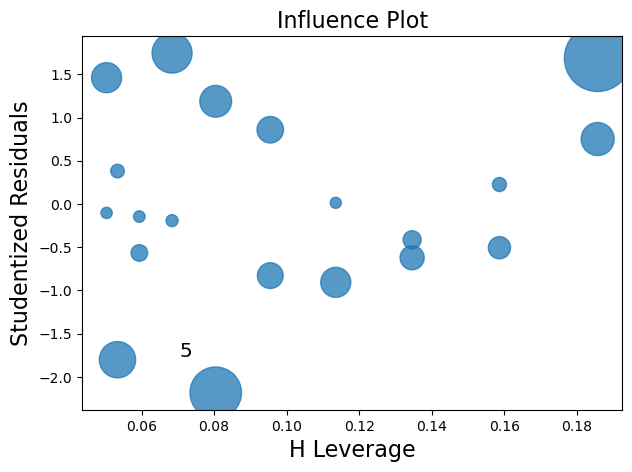

In [34]:
fig = sm.graphics.influence_plot(results, criterion="cooks")
fig.tight_layout(pad=1.0)

eval_env: 1
eval_env: 1


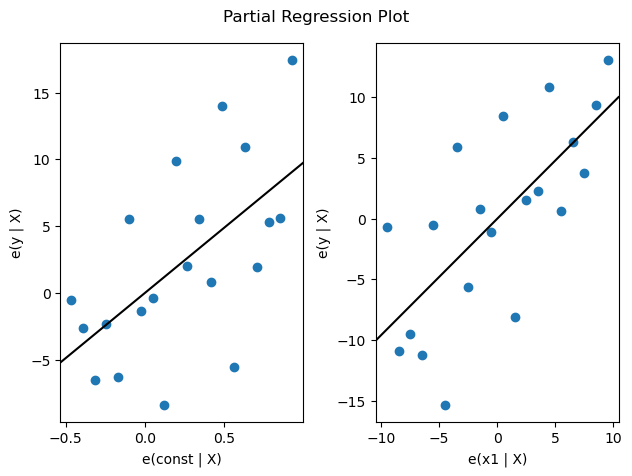

In [35]:
fig = sm.graphics.plot_partregress_grid(results)
fig.tight_layout(pad=1.0)

In [138]:
def make_regression(var, obs, a, b):
    #define seed with 1 to make the experiment repeatable with same data
    #seed(1)
    #Generate a sequence of n disturbances 
    e = normal(loc=0, scale=1, size=obs)
    EPS1=e*var
    X=np.arange(1,obs+1)
    #We are developing equation (1) α+βx
    YSYS=a+b*X
    Y=YSYS+EPS1
    Y #this is our data explanatory variable 
    return X, Y
   

In [139]:
(X, Y)=make_regression(5, 20, 10, 1)
Y

array([ 8.99560904, 16.12002809, 10.18847284, 23.77439038,  8.34024167,
        7.1965572 ,  8.74639367, 13.54722208, 13.40442301, 29.78039452,
       19.36750251, 15.28662105, 28.57191488, 21.06738031, 18.81573312,
       30.37919464, 30.11681088, 25.82521659, 36.0377    , 30.6455079 ])

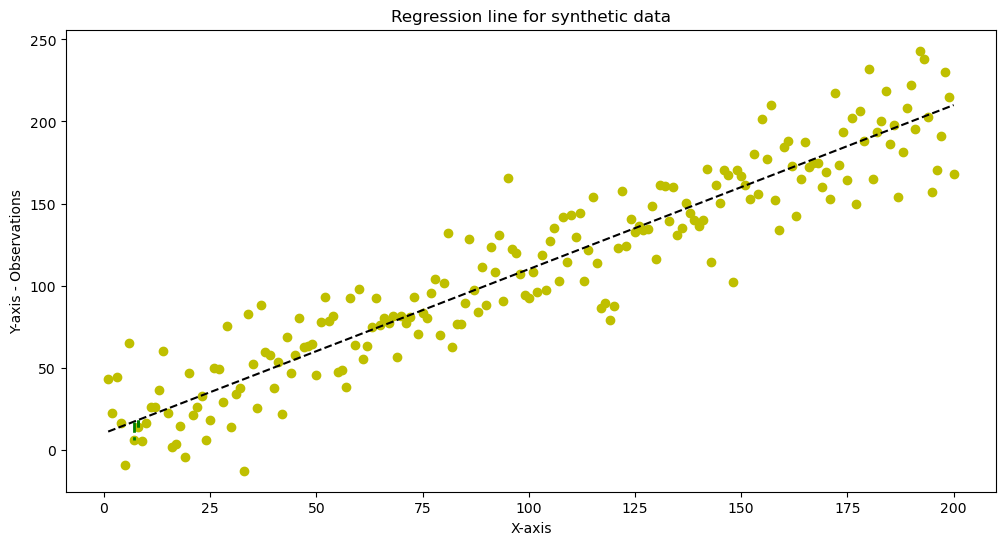

In [140]:
(X, Y)=make_regression(20, 200, 10, 1)
fig = plt.figure(figsize=(12,6))  #setting the figure size
plt.title('Regression line for synthetic data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis - Observations')
plt.plot(X, Y, 'yo', X, b*X+a, '--k')
plt.plot([X[7],X[7]], [18, Y[7]],color='green',linestyle='dashed',linewidth=2)
plt.plot([X[7],X[7]], [18, Y[7]],color='green',linestyle='dashed',linewidth=2, label="ei")
plt.plot([X[6],X[6]], [17, Y[6]],color='green',linestyle='dashed',linewidth=2, label="ei")
plt.show()

In [141]:
X

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [142]:
Y

array([ 43.33899198,  22.05481764,  44.17611081,  16.18805393,
        -9.39488794,  64.98737298,   6.08451664,  14.02324274,
         4.9920299 ,  15.93211102,  25.85338882,  26.03660358,
        36.22040575,  59.84316418,  22.59070856,   1.33758529,
         3.35363747,  14.68490964,  -4.48391615,  46.50059649,
        21.03572873,  25.78030043,  32.96217034,   6.06759151,
        17.77367278,  49.49423051,  49.37078262,  29.13656139,
        75.21069828,  13.88546155,  34.1002558 ,  37.38320514,
       -12.8617    ,  82.75057627,  52.32664029,  25.10821236,
        88.02346886,  59.71324   ,  57.5905228 ,  37.86003204,
        53.12445448,  21.48639368,  68.90052189,  46.51123362,
        57.68096393,  80.04109724,  62.69496222,  63.24934891,
        64.5299861 ,  45.33456792,  77.72009439,  92.86718222,
        78.1761132 ,  81.69817629,  47.45436962,  48.64425554,
        38.18247951,  92.64506142,  63.91640265,  97.99687885,
        55.36176635,  63.24982034,  74.90850174,  92.42

In [143]:
def find_reg_params(X, Y):
    #calculate the mean for x and y 
    x_mean=np.mean(X)
    y_mean=np.mean(Y)
    #Calculate Σxi and Σyi
    Sx=np.sum(X)
    Sy=np.sum(Y)
    #Square X and Y
    X_sq=X**2
    Y_sq=Y**2
    #Calculate Σxiyi
    Sxy=np.dot(X, Y.T)
    X_sum_sq=np.sum(X_sq)
    Y_sum_sq=np.sum(Y_sq)
    #Our nominator is
    nom=Sxy-((Sx*Sy)/20)
    print (nom)
    #Our dennominator is
    den=X_sum_sq-((1/n)*(Sx)**2)
    #print (den)
    #And we finally find b
    b_c=nom/den
    #print ("calculated parameter b is", b_c)
    #And we find a as well
    alpha=np.mean(Y)-b*np.mean(X)
    #print ("calculated parameter a is", alpha)
    return alpha, b_c

In [146]:
(X_g, Y_g)=make_regression(5, 20, 10, 1)
(a_c,b_c)=find_reg_params(X_g, Y_g)

665.1334362831476
calculated parameter b is 1.0002006560648835
calculated parameter a is 9.912610731995855


In [147]:
a_c

9.912610731995855

In [148]:
b_c

1.0002006560648835

In [149]:
a_val=np.zeros(20001)
b_val=np.zeros(20001)
for i in range(20001):
    (X_gen,Y_gen)=(Y, X)=make_regression(5, 20, 10, 1)
    (a_val[i],b_val[i]) = find_reg_params(X_gen, Y_gen)
    

512.7763413768844
calculated parameter b is 0.7710922426720066
calculated parameter a is 10.134871935823636
427.7179561451949
calculated parameter b is 0.6431848964589396
calculated parameter a is 9.926442796028475
835.5496840007418
calculated parameter b is 1.2564656902266793
calculated parameter a is 9.631588671779532
425.60888476134824
calculated parameter b is 0.6400133605433808
calculated parameter a is 11.597124089194129
852.706694677222
calculated parameter b is 1.2822657062815368
calculated parameter a is 8.739179882265763
623.2786508495547
calculated parameter b is 0.9372611290970747
calculated parameter a is 12.153630967796609
829.4317289298315
calculated parameter b is 1.2472657577892203
calculated parameter a is 11.018223201427602
743.9646007538181
calculated parameter b is 1.1187437605320574
calculated parameter a is 8.839994299715414
587.8322669755989
calculated parameter b is 0.8839582962039082
calculated parameter a is 9.748765642881686
653.7060631226213
calculated para

783.3826233900154
calculated parameter b is 1.1780189825413765
calculated parameter a is 8.36298019790927
618.545804549175
calculated parameter b is 0.9301440669912406
calculated parameter a is 10.68148656318909
464.48192982219007
calculated parameter b is 0.6984690674017896
calculated parameter a is 9.85868620521104
829.8803101579215
calculated parameter b is 1.2479403160269495
calculated parameter a is 10.545066806491779
745.6234826399368
calculated parameter b is 1.1212383197593034
calculated parameter a is 11.745016450019445
454.70838302692755
calculated parameter b is 0.6837720045517708
calculated parameter a is 10.387548711857225
754.7709926830858
calculated parameter b is 1.1349939739595274
calculated parameter a is 10.827447180099835
728.3635766216194
calculated parameter b is 1.0952835738670967
calculated parameter a is 11.629164879750522
472.65039147908374
calculated parameter b is 0.7107524683895996
calculated parameter a is 10.132885122538443
815.9395009698246
calculated pa

638.8467548164544
calculated parameter b is 0.9606718117540668
calculated parameter a is 10.058395582864307
582.2781172356536
calculated parameter b is 0.8756061913318098
calculated parameter a is 9.908408728627187
792.9902250493697
calculated parameter b is 1.1924665038336386
calculated parameter a is 8.396640279813855
674.8139121685317
calculated parameter b is 1.0147577626594462
calculated parameter a is 9.7130123789299
703.1516975946543
calculated parameter b is 1.0573709738265478
calculated parameter a is 10.426734834760019
623.6403181775231
calculated parameter b is 0.9378049897406363
calculated parameter a is 8.330257980769016
795.0933646124322
calculated parameter b is 1.1956291197179432
calculated parameter a is 11.494352417389358
717.7259295273943
calculated parameter b is 1.0792871120712697
calculated parameter a is 10.798437044394152
719.7999829668388
calculated parameter b is 1.0824059894238178
calculated parameter a is 11.090822668296333
706.4912099502953
calculated param

747.4390180606924
calculated parameter b is 1.1239684482115675
calculated parameter a is 9.41074375516132
344.5060854303729
calculated parameter b is 0.518054263805072
calculated parameter a is 11.107361448304182
554.0009658242761
calculated parameter b is 0.8330841591342498
calculated parameter a is 9.744572065239758
431.9936469191307
calculated parameter b is 0.6496145066453093
calculated parameter a is 11.163261253300448
616.2756148188264
calculated parameter b is 0.9267302478478593
calculated parameter a is 9.942698560477314
674.1836768242465
calculated parameter b is 1.0138100403372128
calculated parameter a is 10.12403568179915
834.9060772475668
calculated parameter b is 1.2554978605226568
calculated parameter a is 10.644612117374919
514.5483717146417
calculated parameter b is 0.7737569499468296
calculated parameter a is 10.147701815300312
439.50920752599313
calculated parameter b is 0.6609161015428469
calculated parameter a is 8.13895154545759
602.3370025397844
calculated parame

782.4267417069395
calculated parameter b is 1.1765815664766008
calculated parameter a is 9.270381950602303
567.6577218852644
calculated parameter b is 0.8536206344139314
calculated parameter a is 11.785527962824261
549.809144178098
calculated parameter b is 0.8267806679369895
calculated parameter a is 12.029126146876823
665.5586693742143
calculated parameter b is 1.0008401043221269
calculated parameter a is 10.831412350072604
712.0350533892597
calculated parameter b is 1.0707294035928718
calculated parameter a is 9.051111833985306
657.6355386252717
calculated parameter b is 0.9889256219928898
calculated parameter a is 8.744943273487813
744.3603672564304
calculated parameter b is 1.1193388981299706
calculated parameter a is 10.256495983069836
363.77568445674115
calculated parameter b is 0.5470311044462273
calculated parameter a is 9.877567823822154
592.9870038502904
calculated parameter b is 0.8917097802260007
calculated parameter a is 11.587731909490422
465.8625975044588
calculated par

712.9653370663818
calculated parameter b is 1.0721283264156118
calculated parameter a is 8.66079602222819
440.5944396054647
calculated parameter b is 0.6625480294819018
calculated parameter a is 12.090867758014038
684.0276973586215
calculated parameter b is 1.0286130787347691
calculated parameter a is 10.394736267011673
600.409440913495
calculated parameter b is 0.9028713397195414
calculated parameter a is 11.080341547500563
635.2203455146737
calculated parameter b is 0.9552185646837198
calculated parameter a is 10.082694925902295
678.6502570185594
calculated parameter b is 1.020526702283548
calculated parameter a is 10.294243113100396
477.65347492513865
calculated parameter b is 0.7182759021430657
calculated parameter a is 9.86240626785791
603.4334365038185
calculated parameter b is 0.9074187015095014
calculated parameter a is 9.574317461963506
281.26121974575017
calculated parameter b is 0.4229492026251882
calculated parameter a is 9.898896835131954
772.3860947173825
calculated param

649.0271962101097
calculated parameter b is 0.975980746180616
calculated parameter a is 10.737160943025778
444.0028659452528
calculated parameter b is 0.6676734826244403
calculated parameter a is 9.594438906475173
533.5389126705159
calculated parameter b is 0.8023141543917531
calculated parameter a is 10.258555309956677
746.3318104349846
calculated parameter b is 1.1223034743383227
calculated parameter a is 11.36230396440465
429.26113615371287
calculated parameter b is 0.6455054679003202
calculated parameter a is 8.150073015196263
773.4139648969212
calculated parameter b is 1.1630285186419869
calculated parameter a is 10.311737124168587
736.9211171965262
calculated parameter b is 1.1081520559346258
calculated parameter a is 9.885896070234736
610.4304686877267
calculated parameter b is 0.9179405544176341
calculated parameter a is 8.946304948944682
546.7711118195894
calculated parameter b is 0.8222121982249464
calculated parameter a is 10.486468500932357
910.9352744776652
calculated para

882.5742478920965
calculated parameter b is 1.327179320138491
calculated parameter a is 9.553880118857688
807.0540047086652
calculated parameter b is 1.2136150446746845
calculated parameter a is 10.255870997399391
488.8456797739227
calculated parameter b is 0.7351062853743199
calculated parameter a is 10.611190696005135
506.77210463711344
calculated parameter b is 0.7620633152437796
calculated parameter a is 9.90287684760371
404.8442389853635
calculated parameter b is 0.6087883293012986
calculated parameter a is 10.864418208359627
669.2814814412241
calculated parameter b is 1.006438317956728
calculated parameter a is 9.245190994589812
697.8855460792211
calculated parameter b is 1.04945194899131
calculated parameter a is 9.816088923369367
683.0392214044668
calculated parameter b is 1.0271266487285216
calculated parameter a is 11.391513167857347
462.8089258752343
calculated parameter b is 0.6959532719928335
calculated parameter a is 10.888328041553365
732.0638088925771
calculated paramet

713.9841143255926
calculated parameter b is 1.0736603222941241
calculated parameter a is 9.477942116912125
692.5644213391943
calculated parameter b is 1.0414502576529236
calculated parameter a is 10.389421762528237
324.1450812663661
calculated parameter b is 0.48743621243062574
calculated parameter a is 10.515515493500196
739.1404203081947
calculated parameter b is 1.1114893538469093
calculated parameter a is 8.660635152903446
863.2668275897158
calculated parameter b is 1.298145605398069
calculated parameter a is 10.423046374705017
556.5499290034531
calculated parameter b is 0.8369171864713582
calculated parameter a is 8.950189555539644
538.4867631614361
calculated parameter b is 0.8097545310698288
calculated parameter a is 10.230816235422434
466.0570273135586
calculated parameter b is 0.7008376350579828
calculated parameter a is 7.965290811069998
558.0583124328132
calculated parameter b is 0.8391854322297942
calculated parameter a is 9.428717548337747
762.7983437325593
calculated para

776.2123887477583
calculated parameter b is 1.1672366748086591
calculated parameter a is 11.084798476648906
717.6744242181494
calculated parameter b is 1.07920966047842
calculated parameter a is 9.291147845747538
580.8227326915558
calculated parameter b is 0.8734176431451967
calculated parameter a is 10.826736363569523
688.3030995253284
calculated parameter b is 1.035042254925306
calculated parameter a is 10.369622305077833
706.0842256676897
calculated parameter b is 1.0617807904777288
calculated parameter a is 11.330107987691044
752.3862335899839
calculated parameter b is 1.1314078700601262
calculated parameter a is 9.027917194112007
472.2429605310317
calculated parameter b is 0.7101397902722282
calculated parameter a is 8.570315720170004
644.2246995008918
calculated parameter b is 0.9687589466178824
calculated parameter a is 6.930611146233719
914.7621016900566
calculated parameter b is 1.3755821078045964
calculated parameter a is 10.876359643095967
959.4498124381025
calculated parame

390.5984331517393
calculated parameter b is 0.5873660648898336
calculated parameter a is 10.16447523080755
540.3716090216003
calculated parameter b is 0.8125888857467674
calculated parameter a is 11.268968641048453
611.5489428574856
calculated parameter b is 0.9196224704623843
calculated parameter a is 10.329009483793605
540.945050581633
calculated parameter b is 0.813451203882155
calculated parameter a is 9.497606946679134
573.0307874665677
calculated parameter b is 0.861700432280553
calculated parameter a is 9.409380349126614
646.4732312597898
calculated parameter b is 0.9721401973831426
calculated parameter a is 9.94258207061462
462.98732846348776
calculated parameter b is 0.6962215465616357
calculated parameter a is 10.984458002287074
589.5292932287375
calculated parameter b is 0.8865102153815602
calculated parameter a is 10.964430265239521
607.9152945897704
calculated parameter b is 0.914158337728978
calculated parameter a is 10.326276283458654
684.6369310033051
calculated paramet

In [150]:
np.mean(b_val)

0.9978901460035264

In [151]:
np.mean(a_val)

10.007166118221535